# Homework 3

In [8]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import os
from collections import Counter
import sklearn
from scipy.spatial.distance import cdist
import functools

random.seed(27)

### Question 1  <font color=red> TO DO</font>

### Question 2

$$
\begin{equation*}
    \begin{split}
        J(w) = max\{0, 1-yw^Tx\} = \begin{cases} 0 \textbf{ if } yw^Tx\geq1\\1-yw^Tx \textbf{ if } yw^Tx<1\end{cases}= \begin{cases} 0 \textbf{ if } yw^Tx\geq1\\-yx \textbf{ if } yw^Tx<1\end{cases}\\
    \end{split}
\end{equation*}
$$

### Question 3 <font color=red> TO DO</font>

A function is convex if for all $x, y$ in the domain of $f$ for all $\theta \in (0,1)$:
$$
\begin{equation*}
    \begin{split}
        \theta f(a) + (1-\theta)f(b) \geq f(\theta a + (1-\theta)(b))
    \end{split}
\end{equation*}
$$

Let's suppose that f is not convex. <br>
Then, there is a point $x_0$ in some interval $x \in (a,b)$, such that $f(x_0)$ lies above $\theta f(a) + (1-\theta)f(b)$. It is trivial that at that point $x_0$, 

### Question 4

Desmos

### Question 5

Notebook

### Given code (SVM with Pegasos algorithm)

In [9]:
def read_data(file):
    '''
    Read each file into a list of strings.
    '''
    f = open(file)
    lines = f.read().split(' ')
    symbols = '${}()[].,:;+-*/&|<>=~" '
    words = map(lambda Element: Element.translate(str.maketrans("", "", symbols)).strip(), lines)
    words = filter(None, words)
    return list(words)

In [10]:
def folder_list(path,label):
    '''
    PARAMETER PATH IS THE PATH OF YOUR LOCAL FOLDER
    '''
    filelist = os.listdir(path)
    review = []
    for infile in filelist:
        file = os.path.join(path,infile)
        r = read_data(file)
        r.append(label)
        review.append(r)
    return review

In [11]:
def load_and_shuffle_data():
    '''
    pos_path is where you save positive review data.
    neg_path is where you save negative review data.
    '''
    pos_path = "data/pos"
    neg_path = "data/neg"
    
    #pos_path = "C:\\Users\\alexx\\OneDrive\\Escritorio\\hw3\\data_reviews\\data\\pos"
    #neg_path = "C:\\Users\\alexx\\OneDrive\\Escritorio\\hw3\\data_reviews\\data\\neg"
    
    pos_review = folder_list(pos_path,1)
    neg_review = folder_list(neg_path,-1)

    review = pos_review + neg_review
    random.shuffle(review)
    return review

In [12]:
# Taken from http://web.stanford.edu/class/cs221/ Assignment #2 Support Code
def dotProduct(d1, d2):
    """
    @param dict d1: a feature vector represented by a mapping from a feature (string) to a weight (float).
    @param dict d2: same as d1
    @return float: the dot product between d1 and d2
    """
    if len(d1) < len(d2):
        return dotProduct(d2, d1)
    else:
        return sum(d1.get(f, 0) * v for f, v in d2.items())

In [13]:
def increment(d1, scale, d2):
    """
    Implements d1 += scale * d2 for sparse vectors.
    @param dict d1: the feature vector which is mutated.
    @param float scale
    @param dict d2: a feature vector.

    NOTE: This function does not return anything, but rather
    increments d1 in place. We do this because it is much faster to
    change elements of d1 in place than to build a new dictionary and
    return it.
    """
    for f, v in d2.items():
        d1[f] = d1.get(f, 0) + v * scale


### Question 6

In [14]:
def bag_of_words(input_):
    return Counter(input_)

### Question 7

In [15]:
review = load_and_shuffle_data()

In [16]:
X_train, X_test, y_train, y_test = [], [], [], []

for doc in review[0:1500]:
    X_train.append(bag_of_words(doc[0:-1])) #Read all words except the label
    y_train.append(doc[-1]) #Read the label
    
for doc in review[1500:2000]:
    X_test.append(bag_of_words(doc[0:-1])) #Read all words except the label
    y_test.append(doc[-1]) #Read the label

### Question 8

In [17]:
def pegasos(X_train, y_train, epochs = 3, lbd=0.01):
    
    t, w = 1, {}

    for _ in range(epochs):
        for idx in range(0, len(X_train)):
            t += 1
            step = 1/(t*lbd)

            #Update w regardless of the training point
            for key, value in w.items():
                w[key] = value * (1-step*lbd)

            if y_train[idx] * dotProduct(w, X_train[idx]) < 1:
                increment(w, step * y_train[idx], X_train[idx])
                
    return w 

### Question 9

In [18]:
def optimized_pegasos(X_train, y_train, epochs = 3, lbd=0.01):
         
    s, t, w = 1, 1, {}
    for _ in range(epochs):
        for idx in range(0, len(X_train)):
            t += 1
            step = 1/(t*lbd)
            s *= (1-step*lbd) #Update s regardless of the training point

            if y_train[idx] * dotProduct(w, X_train[idx]) * s < 1:
                increment(w, (1/s) * step * y_train[idx], X_train[idx])
    for key, value in w.items():
        w[key] = value * s
            
    return w

### Question 10

In [19]:
%%time
w = pegasos(X_train, y_train, epochs=3, lbd=0.01)
print(list(w.items())[0:5])

[('will', 3.4436791824039124), ('hunting', 0.7776049766718484), ('matt', 0.31104199066874), ('damon', 0.5109975560986435), ('is', 1.1775161075316511)]
Wall time: 13.8 s


In [14]:
%%time
w = optimized_pegasos(X_train, y_train, epochs=3, lbd=0.01)
print(list(w.items())[0:5])

[('will', 3.4436791824039092), ('hunting', 0.7776049766718498), ('matt', 0.3110419906687397), ('damon', 0.5109975560986442), ('is', 1.1775161075316611)]
Wall time: 333 ms


The first method takes around 15 seconds, whereas the second method takes 0.3 seconds.

### Question 11

In [15]:
def classification_error(X, y, w):

    count = 0
    for idx in range(len(X)):
        pred = dotProduct(w, X[idx])
    
        if pred * y[idx] < 0:
            count += 1
    return round(count/len(X),3)

### Question 12

In [13]:
lambda_list = [10**-3, 0.01, 0.05, 0.1, 0.12, 0.5, 1]
error_list = []
    
for lbd in lambda_list:
    w = optimized_pegasos(X_train, y_train, epochs=50, lbd=lbd)
    error_list.append(classification_error(X_test, y_test, w))

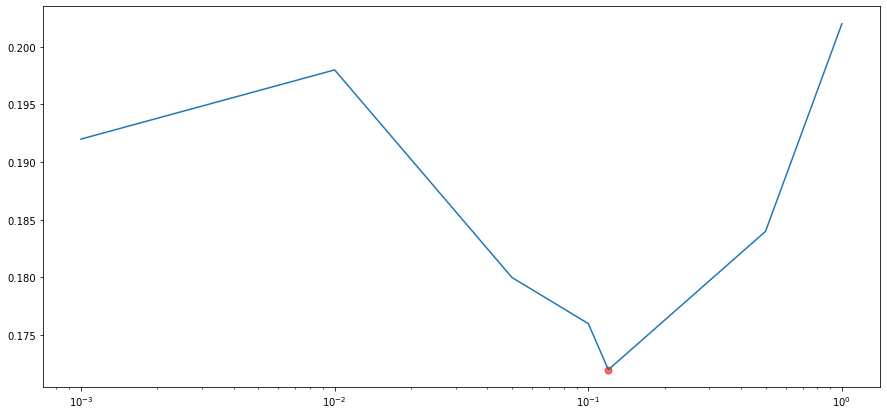

In [14]:
plt.figure(figsize=(15, 7))
plt.plot(lambda_list, error_list)
plt.scatter(lambda_list[np.argmin(error_list)], np.min(error_list), color='red', s=50, alpha=0.6)
plt.xscale('log')
plt.show()

In [112]:
opt_lambda = 0.12

In [15]:
lambda_list

[0.001, 0.01, 0.05, 0.1, 0.12, 0.5, 1]

In [16]:
error_list 

[0.192, 0.198, 0.18, 0.176, 0.172, 0.184, 0.202]

### Question 13

In [297]:
w = optimized_pegasos(X_train, y_train, epochs=10, lbd=opt_lambda)

score_list = []
for idx in range(len(X_test)):
        score_list.append(dotProduct(w, X_test[idx]))

In [300]:
score_dict = {}
score_dict["below -2"] = [(score, label) for score, label in zip(score_list, y_test) if score <= -2]
score_dict["-2 to 0"] = [(score, label) for score, label in zip(score_list, y_test) if (score < 0) & (score > -2)]
score_dict["0 to 2"] = [(score, label) for score, label in zip(score_list, y_test) if (score > 0) & (score < 2)]
score_dict["above 2"] = [(score, label) for score, label in zip(score_list, y_test) if score >= 2]

In [310]:
margin_dict = {}
margin_dict["below -2"] = [1 if score*label < 0 else 0 for score, label in score_dict["below -2"]]
margin_dict["-2 to 0"] = [1 if score*label < 0 else 0 for score, label in score_dict["-2 to 0"]]
margin_dict["0 to 2"] = [1 if score*label < 0 else 0 for score, label in score_dict["0 to 2"]]
margin_dict["above 2"] = [1 if score*label < 0 else 0 for score, label in score_dict["above 2"]]

In [321]:
rows = []
for key, value in margin_dict.items():
     rows.append([key, len(value), np.sum(value), len(value)-np.sum(value), round((len(value)-np.sum(value))/len(value), 3)])
        
df = pd.DataFrame(rows, columns=["Range", "Total", "Correct", "Incorrect", "Classification error"])
df.set_index("Range")

Total  Correct  Incorrect  Classification error
Range                                                    
below -2    106        5        101                 0.953
-2 to 0     167       53        114                 0.683
0 to 2      147       33        114                 0.776
above 2      80        2         78                 0.975

It is clear that the algorithm has much more confidence in its prediction when the score is higher than 2 for positive predictions and lower than -2 for negative predictions.

### Question 14

In [ ]:
w = optimized_pegasos(X_train, y_train, epochs=10, lbd=opt_lambda)

score_list = []
for idx in range(len(X_test)):
        score_list.append(dotProduct(w, X_test[idx]))

### Question 15

To obtain the value for w that minimizes this expression we have to derive it with respect to w and equal it to 0.

$$
\begin{equation*}
    \begin{split}
J(w) = ||Xw-y||^2 + \lambda||w||^2 = w^tX^TXw-2w^TX^Ty+\lambda w^Tw
    \end{split}
\end{equation*}
$$

$$
\begin{equation*}
    \begin{split}
\frac{\partial J(w)}{\partial w} = 0\\
&\rightarrow 2X^TXw-2X^Ty+2\lambda Iw = 0 \\
&\rightarrow X^Ty = X^TXw+\lambda Iw\\
&\rightarrow w=(X^TX+\lambda I)^{-1}X^Ty
    \end{split}
\end{equation*}
$$

Now, let's prove that $(X^TX+\lambda I)^{-1}$ exists by proving that the matrix $X^TX+\lambda I$ is Positive Definite and therefore invertible.

$$
\begin{equation*}
    \begin{split}
z^TMz\geq 0 \\
&\rightarrow z^TX^TXz \geq 0\\
&\rightarrow (Xz)^T(Xz) \geq 0\\
&\rightarrow ||Xz||^2 \geq 0\\
    \end{split}
\end{equation*}
$$

In this proof we can see that any symmetric matrix ($X^TX$) is Positive semi-Definite.

As a consequence, the condition $λ > 0$ is sufficient to
guarantee that $XT X + λI$ is Positive Definite.

<font color='red'> Add proof lambda </font> 

### Question 16

$$
\begin{equation*}
    \begin{split}
        \lambda X^TXw + \lambda Iw = X^Ty \rightarrow \lambda Iw = X^Ty-X^TXw  \rightarrow w = \frac{1}{\lambda}(X^Ty-X^TXw)\\
    \end{split}
\end{equation*}
$$

Which can then be rewritten as:

$$
\begin{equation*}
    \begin{split}
        w = \frac{1}{\lambda}(X^Ty-X^TXw) \rightarrow w=X^T(\frac{1}{\lambda}y - \frac{1}{\lambda}Xw) \rightarrow w = X^T \alpha
    \end{split}
\end{equation*}
$$

### Question 17

Because we can see that $w$ is a linear combination of our input data $X$ (where the coefficients are the resulting vector $\alpha$)

### Question 18

$$
\begin{equation*}
    \begin{split}
        \alpha = \frac{1}{\lambda}(y-Xw) \\
        &\rightarrow \alpha = \frac{1}{\lambda}(y-XX^T\alpha)\\
        &\rightarrow \lambda\alpha + XX^T\alpha = y\\
        &\rightarrow (\lambda I + XX^T)\alpha = y\\
        &\rightarrow \alpha = (\lambda I + XX^T)^{-1}y\\
    \end{split}
\end{equation*}
$$

### Question 19

$$
\begin{equation*}
    \begin{split}
        Xw =\\
        &= X(X^T\alpha)\\
        &= X(X^T(\lambda I + XX^T)^{-1}y)\\
        &= XX^T(\lambda I + XX^T)^{-1}y\\
    \end{split}
\end{equation*}
$$

### Question 20

$$
\begin{equation*}
    \begin{split}
        f(x) = x^Tw\\
        &= x^T(X^T\alpha)\\
        &= \sum_{i} \alpha_i \langle x^T, x_i \rangle \\
        &= \sum_{i} \alpha_i k_x\\
    \end{split}
\end{equation*}
$$

### Question 21

In [20]:
def linear_kernel(X1, X2):
    """
    Computes the linear kernel between two sets of vectors.
    Args:
        X1 - an n1xd matrix with vectors x1_1,...,x1_n1 in the rows
        X2 - an n2xd matrix with vectors x2_1,...,x2_n2 in the rows
    Returns:
        matrix of size n1xn2, with x1_i^T x2_j in position i,j
    """
    return np.dot(X1,np.transpose(X2))

In [21]:
def RBF_kernel(X1,X2,sigma):
    """
    Computes the RBF kernel between two sets of vectors   
    Args:
        X1 - an n1xd matrix with vectors x1_1,...,x1_n1 in the rows
        X2 - an n2xd matrix with vectors x2_1,...,x2_n2 in the rows
        sigma - the bandwidth (i.e. standard deviation) for the RBF/Gaussian kernel
    Returns:
        matrix of size n1xn2, with exp(-||x1_i-x2_j||^2/(2 sigma^2)) in position i,j
    """
    numerator = cdist(X1,X2,'sqeuclidean')
    denominator = 2 * sigma**2
    return np.exp(-numerator / denominator)

In [22]:
def polynomial_kernel(X1, X2, offset, degree):
    """
    Computes the inhomogeneous polynomial kernel between two sets of vectors
    Args:
        X1 - an n1xd matrix with vectors x1_1,...,x1_n1 in the rows
        X2 - an n2xd matrix with vectors x2_1,...,x2_n2 in the rows
        offset, degree - two parameters for the kernel
    Returns:
        matrix of size n1xn2, with (offset + <x1_i,x2_j>)^degree in position i,j
    """
    return (offset + X1 @ X2.T)**degree

### Question 22

In [33]:
x_0 = np.array([[-4], [-1], [0], [2]])

linear_kernel(x_0, x_0)

array([[16,  4,  0, -8],
       [ 4,  1,  0, -2],
       [ 0,  0,  0,  0],
       [-8, -2,  0,  4]])

### Question 23

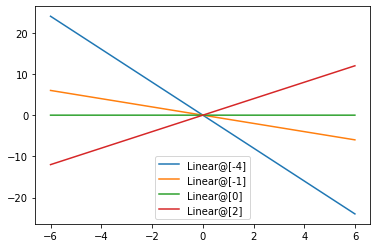

In [55]:
# PLot kernel machine functions

plot_step = .01
xpts = np.arange(-6, 6, plot_step).reshape(-1,1)
prototypes = np.array([-4,-1,0,2]).reshape(-1,1)

# Linear kernel
y = linear_kernel(prototypes, xpts) 
for i in range(len(prototypes)):
    label = "Linear@"+str(prototypes[i,:])
    plt.plot(xpts, y[i,:], label=label)
plt.legend(loc = 'best')
plt.show() 
 
 

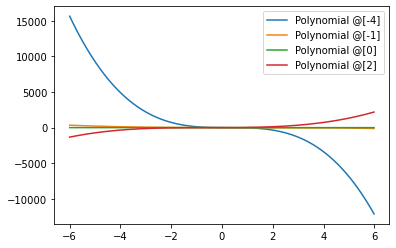

In [49]:
# RBF kernel
y = polynomial_kernel(prototypes, xpts, offset=1, degree=3) 
for i in range(len(prototypes)):
    label = "Polynomial @"+str(prototypes[i,:])
    plt.plot(xpts, y[i,:], label=label)
plt.legend(loc = 'best')
plt.show() 

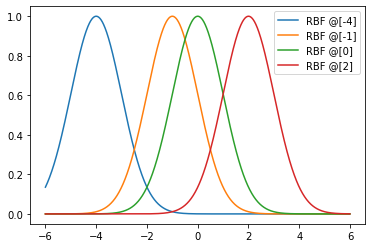

In [50]:
# RBF kernel
y = RBF_kernel(prototypes, xpts, sigma=1) 
for i in range(len(prototypes)):
    label = "RBF @"+str(prototypes[i,:])
    plt.plot(xpts, y[i,:], label=label)
plt.legend(loc = 'best')
plt.show() 

### Question 24

In [31]:
class Kernel_Machine(object):
    def __init__(self, kernel, training_points, weights):
        """
        Args:
            kernel(X1,X2) - a function return the cross-kernel matrix between rows of X1 and rows of X2 for kernel k
            training_points - an nxd matrix with rows x_1,..., x_n
            weights - a vector of length n with entries alpha_1,...,alpha_n
        """

        self.kernel = kernel
        self.training_points = training_points
        self.weights = weights
        
    def predict(self, X):
        """
        Evaluates the kernel machine on the points given by the rows of X
        Args:
            X - an nxd matrix with inputs x_1,...,x_n in the rows
        Returns:
            Vector of kernel machine evaluations on the n points in X.  Specifically, jth entry of return vector is
                Sum_{i=1}^R alpha_i k(x_j, mu_i)
        """
        # TODO

### Question 25

### Question 26

### Question 27

### Question 28

### Question 29

### Question 30

### Question 31

### Question 32

### Question 33

### Question 34

### Question 35

### QUESTIONS
